In [262]:
import numpy as np
import cv2, math
from matplotlib import pyplot as plt

In [263]:
# helper function for diplaying images
def showImages(imgs, names, width=10, height=10):
    # changing the size of canvas
    plt.rcParams['figure.figsize'] = [width, height] 

    plot = 130
    for i in range(len(imgs)):
        plot += 1
        plt.subplot(plot), plt.imshow(imgs[i], cmap='gray'), plt.title(names[i])
    plt.tight_layout()
    plt.show()


In [264]:
# function for creating a Laplacian mask for fourier domain
def laplacianMask(shape):
    # mask with 2 planes because we have real and imaginary values in filter
    mask = np.zeros((shape[0], shape[1], 2), dtype='float32')
    M = shape[0] # rows
    N = shape[1] # cols

    for i in range(M):
        for j in range(N):
            mask[i][j] = -((i-M/2)**2 + (j-N/2)**2) 
    return mask

In [265]:
# function for creating a ideal highpass filter for given D value
def idealHighpassFilter(shape, D):
    mask = np.zeros(shape, dtype='float32')
    M = shape[0] # rows
    N = shape[1] # cols
    
    for i in range(M):
        for j in range(N):
            mask[i][j] = 1 if math.sqrt((i-M/2)**2 + (j-N/2)**2) >= D else 0 
    return mask

In [266]:
if __name__ == '__main__':
    img = cv2.imread('car.jpg',0) # read the image
    img_float32 = np.float32(img)

In [267]:
    """ Question 1 """
    
    # discreate fourier transform
    dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT) 
    # shift the zero freq components
    dft_shift = np.fft.fftshift(dft)

In [268]:
    mask = laplacianMask(img.shape)
    # calculate magnitude of complex values
    mask_to_display = cv2.magnitude(mask[:,:,0],mask[:,:,1])
    # normalize mask values to 0-255 range to display
    mask_to_display = cv2.normalize(mask_to_display, None, 0, 255, cv2.NORM_MINMAX)
    # apply mask and inverse DFT
    fshift = dft_shift * mask

    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift) 
    
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    # normalize values back to 0-255 range
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)

In [269]:
    # showImages([img, img_back, mask_to_display], ['Input Image', 'Highpas Laplacian filtered image', 'Laplacian mask'], 30, 10)

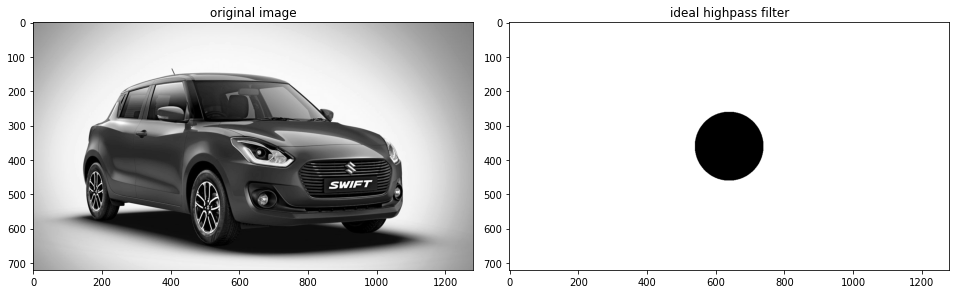

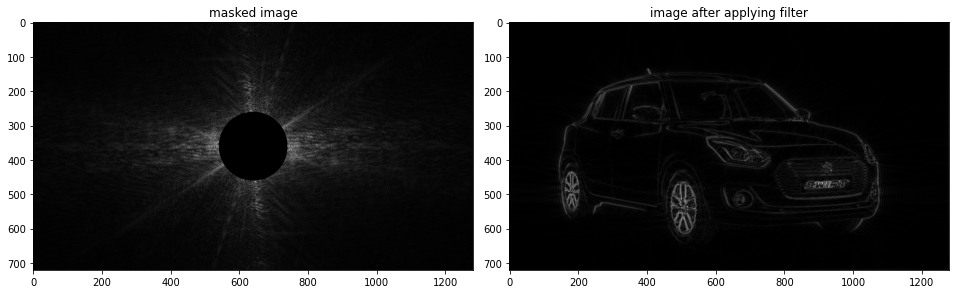

In [270]:
    """ Question 2"""

    f = np.fft.fft2(img) # fast fourier transform
    fshift = np.fft.fftshift(f) # shift zero freq components to center

    # creating a ideal highpassfilter mask with D=100
    mask = idealHighpassFilter(img.shape, 100)

    # applying the mask
    masked = fshift * mask

    # taking magnitude of result
    mask_spectrum = np.abs(masked)
    # normalize into 0-255 range
    mask_spectrum = cv2.normalize(mask_spectrum, None, 0, 255, cv2.NORM_MINMAX)

    # shift back the zero freq components
    f_ishift = np.fft.ifftshift(masked)
    img_back = np.fft.ifft2(f_ishift) # inverse fast fourier transform
    img_back = np.abs(img_back) # taking magnitude of image to display

    showImages([img, mask], ['original image', 'ideal highpass filter'], 20, 10)
    showImages([mask_spectrum, img_back], ['masked image', 'image after applying filter'], 20, 10)
